# Ensemble Bagging
https://www.section.io/engineering-education/implementing-bagging-algorithms-in-python/

In [12]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [13]:
#Import Libraries
import numpy as np
import pandas as pd

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Nurul-Faizah/Dataset/main/pima_indians_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [41]:
#Data cleaning
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for column in zero_not_accepted :
  df[column] = df[column].replace(0,np.NaN)
  mean = int (df[column].mean(skipna=True))
  df[column] = df[column].replace(np.NaN,mean)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,Positif Diabetes
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,Negatif Diabetes
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,Positif Diabetes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,Negatif Diabetes
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,Positif Diabetes
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,Negatif Diabetes
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,Negatif Diabetes
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,Negatif Diabetes
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,Positif Diabetes


(768, 8)

In [19]:
# gender code
code_p = "Positif Diabetes"
code_n = "Negatif Diabetes"

# binary value
value_of_one = 1
value_of_zero = 0

def change_code(Outcome):
    return code_p if Outcome == value_of_one else code_n

In [20]:
# Update all values of 'gender' series
df["Outcome"] = df["Outcome"].apply(change_code)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,Positif Diabetes
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,Negatif Diabetes
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,Positif Diabetes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,Negatif Diabetes
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,Positif Diabetes
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,Negatif Diabetes
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,Negatif Diabetes
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,Negatif Diabetes
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,Positif Diabetes


In [21]:
X = df.drop("Outcome",axis="columns")
y = df.Outcome

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_scaled[:3]

array([[ 0.63994726,  0.86525364, -0.03198993,  0.67064253, -0.00331014,
         0.16724016,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.20601255, -0.5283186 , -0.01230129, -0.00331014,
        -0.85155088, -0.36506078, -0.19067191],
       [ 1.23388019,  2.01595708, -0.69376149, -0.01230129, -0.00331014,
        -1.33183808,  0.60439732, -0.10558415]])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10)


In [25]:
X_train.shape

(576, 8)

In [26]:
X_test.shape

(192, 8)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [28]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores

array([0.69480519, 0.64285714, 0.69480519, 0.78431373, 0.77124183])

In [29]:
scores.mean()

0.7176046176046176

In [30]:
from sklearn.ensemble import BaggingClassifier

In [31]:
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=100, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)

In [32]:
bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [33]:
bag_model.oob_score_

0.7517361111111112

In [34]:
bag_model.score(X_test, y_test)

0.8125

In [35]:
import pickle


In [36]:
pickle.dump(bag_model,open('bagging.pkl','wb'))

In [37]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<function matplotlib.pyplot.show(*args, **kw)>

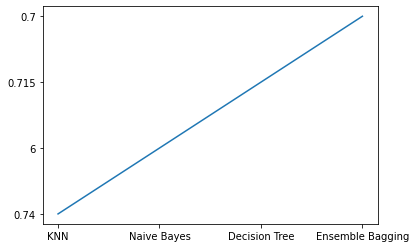

In [38]:
#membuat grafik

x = np.array(['KNN','Naive Bayes','Decision Tree','Ensemble Bagging'])
y = np.array(['0.74','6','0.715','0.7'])

plt.plot(x,y)
plt.show